# **Deep QLearning**

The implementation of Deep QLearning for CartPole-v1.


## Initialization

In [1]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt

In [2]:
from sim.GymTrainer import GymTrainer
from framework.DeepQLearning import DeepQLearning

import torch
trainDevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Create the simulation environment
sim = GymTrainer(
    'CartPole-v1', 
    evalDevice="cpu", 
    trainDevice=trainDevice, 
    render_mode='rgb_array', 
    envNum=1,
    maxEpisode=3000,
    batchSize=6,
    maxStep=1000,
    stepLimitPenalty=0,
    seed=543)

=============Initializing=============
Initializing Gym Environments of CartPole-v1
init envs
set seeds 543


In [4]:
# Create the agent
agent = DeepQLearning(
    actionNum=sim.actionSize(), 
    stateNum=sim.stateSize(), 
    gamma=0.99, 
    qNetLR=0.001)

## Training

In [5]:
name, writer = sim.makeSummaryWriter(agent)
sim.train(agent, writer)

=============Start Training=============
Batch:1 	 Episode:6 	 Loss: 1.00 	 AverageTotalReward: 25.17 	 FinRew: 1.00
Batch:2 	 Episode:12 	 Loss: 0.99 	 AverageTotalReward: 23.83 	 FinRew: 1.00
Batch:3 	 Episode:18 	 Loss: 1.00 	 AverageTotalReward: 18.83 	 FinRew: 1.00
Batch:4 	 Episode:24 	 Loss: 1.00 	 AverageTotalReward: 20.33 	 FinRew: 1.00
Batch:5 	 Episode:30 	 Loss: 0.97 	 AverageTotalReward: 24.67 	 FinRew: 1.00
Batch:6 	 Episode:36 	 Loss: 0.99 	 AverageTotalReward: 22.17 	 FinRew: 1.00
Batch:7 	 Episode:42 	 Loss: 1.01 	 AverageTotalReward: 18.00 	 FinRew: 1.00
Batch:8 	 Episode:48 	 Loss: 0.93 	 AverageTotalReward: 24.50 	 FinRew: 1.00
Batch:9 	 Episode:54 	 Loss: 0.99 	 AverageTotalReward: 20.17 	 FinRew: 1.00
Batch:10 	 Episode:60 	 Loss: 1.01 	 AverageTotalReward: 18.50 	 FinRew: 1.00
Batch:11 	 Episode:66 	 Loss: 0.99 	 AverageTotalReward: 20.83 	 FinRew: 1.00
Batch:12 	 Episode:72 	 Loss: 0.98 	 AverageTotalReward: 19.67 	 FinRew: 1.00
Batch:13 	 Episode:78 	 Loss: 1.0

## Testing

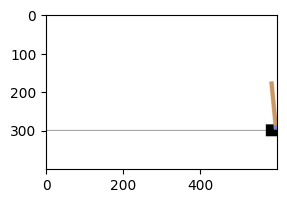

Average Total Reward:75.83333587646484 	 Max Total Reward:184.0 	 Min Total Reward:13.0


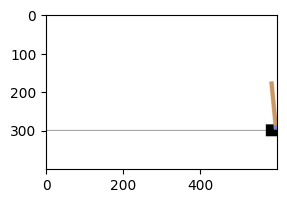

In [6]:
sim.test(
    agent = agent, 
    episode = 12, 
    maxStep = 1000, 
    renderStep = 3,
    writer = writer)

## Save

In [7]:
agent.save(name)

DeepQLearning(
  (qnet): QNetwork(
    (fc1): Linear(in_features=4, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=2, bias=True)
  )
)